# Investigating relationships between variables

In [1]:
import pandas as pd
from scipy import stats 

Data Source:  https://www.heritage.org/index/download

Variables:

    CountryID - ID of the Country
    CountryName - Name of the Country
    HighIncome - Belonging to high income group of countries (1 - belongs, 2 - no)
    Income - Belonging to the income group (low income, middle income, high income 
    Development - Is the country developed or developing 
    Region - Region of the country's location
    WorldRank -  World Rank
    RegionRank -  Region Rank
    2022Score -  2022 Score
    PropertyRights - Property Rights
    JudicialEffectiveness - Judicial Effectiveness
    GovernmentIntegrity - Government Integrity
    TaxBurden -  Tax Burden
    GovernmentSpending - Government Spending
    FiscalHealth - Fiscal Health
    BusinessFreedom - Business Freedom
    LaborFreedom -  Labor Freedom
    MonetaryFreedom - Monetary Freedom
    TradeFreedom - Trade Freedom
    InvestmentFreedom - Investment Freedom 
    FinancialFreedom - Financial Freedom
    TariffRate  - Tariff Rate (%)
    IncomeTaxRate - Income Tax Rate (%)
    CorporateTaxRate - Corporate Tax Rate (%)
    TaxBurdenofGDP - Tax Burden % of GDP
    GovernmentExpenditurofGDP - Gov't Expenditure % of GDP 
    Population - Population (Millions)
    GDP - GDP (Billions, PPP)
    GDP_GrowthRate - GDP Growth Rate (%)
    5Year_GDP_GrowthRate - 5 Year GDP Growth Rate (%)
    GDPperCapita - GDP per Capita (PPP)
    Unemployment - Unemployment (%)
    Inflation - Inflation (%)
    FDIInflow - FDI Inflow (Millions)
    PublicDebt - Public Debt (% of GDP)

In [2]:
df = pd.read_excel('index2022_data.xls', index_col=0)
df

,CountryName,HighIncome,Income,Development,Region,WorldRank,RegionRank,2022Score,PropertyRights,JudicialEffectiveness,...,GovernmentExpenditurofGDP,Population,GDP,GDP_GrowthRate,5Year_GDP_GrowthRate,GDPperCapita,Unemployment,Inflation,FDIInflow,PublicDebt
CountryID,,,,,,,,,,,,,,,,,,,,,
1,Afghanistan,0,low income,developing,Asia-Pacific,NaN,NaN,NaN,NaN,NaN,...,NaN,38.928341,78.729,-5.000,0.9824,2390.024,11.73,5.607,13.000000,7.785
2,Albania,0,middle income,developing,Europe,50.0,30.0,66.6,55.5,49.8,...,30.514667,2.837743,40.737,-3.500,1.9856,14218.106,11.70,1.603,1107.000000,75.960
3,Algeria,0,middle income,developing,Middle East and North Africa,167.0,13.0,45.8,27.9,29.7,...,37.827000,43.851043,491.459,-5.992,0.1016,11112.187,12.83,2.415,1125.000000,53.067
4,Angola,0,middle income,developing,Sub-Saharan Africa,139.0,29.0,52.6,39.8,25.3,...,21.255000,32.866268,215.105,-3.975,-1.8610,6931.862,7.70,22.277,-1866.000000,127.115
5,Argentina,0,middle income,developing,Americas,144.0,27.0,50.1,35.1,57.9,...,39.581333,45.376763,941.848,-9.956,-2.7740,20750.990,11.67,42.015,4123.000000,102.998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,Venezuela,0,middle income,developing,Americas,176.0,32.0,24.8,0.2,4.6,...,26.903000,28.435943,144.737,-30.000,-23.4664,5178.267,9.14,2355.147,959.000000,304.125
180,Vietnam,0,middle income,developing,Asia-Pacific,84.0,18.0,60.6,49.6,33.8,...,21.990000,97.338583,1058.693,2.906,6.1258,10868.858,2.27,3.222,15800.000000,46.615
181,Yemen,0,low income,developing,Middle East and North Africa,NaN,NaN,NaN,NaN,NaN,...,NaN,29.825968,62.583,-5.000,-3.3190,1927.331,13.42,26.183,-370.982778,83.156


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 1 to 183
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CountryName                 184 non-null    object 
 1   HighIncome                  184 non-null    int64  
 2   Income                      184 non-null    object 
 3   Development                 184 non-null    object 
 4   Region                      184 non-null    object 
 5   WorldRank                   177 non-null    float64
 6   RegionRank                  177 non-null    float64
 7   2022Score                   177 non-null    float64
 8   PropertyRights              177 non-null    float64
 9   JudicialEffectiveness       177 non-null    float64
 10  GovernmentIntegrity         177 non-null    float64
 11  TaxBurden                   177 non-null    float64
 12  GovernmentSpending          177 non-null    float64
 13  FiscalHealth                177 non

# Contingency Tables

More information here: https://pbpython.com/pandas-crosstab.html

In [4]:
df.groupby('Income')['Region'].value_counts().unstack() #cells contain frequencies

Region,Americas,Asia-Pacific,Europe,Middle East and North Africa,Sub-Saharan Africa
Income,,,,,
high income,8.0,7.0,31.0,7.0,2.0
low income,1.0,3.0,NaN,2.0,22.0
middle income,23.0,30.0,15.0,9.0,24.0


In [5]:
df.groupby('Income')['Region'].value_counts(normalize=True).unstack() #cells contain percentages

Region,Americas,Asia-Pacific,Europe,Middle East and North Africa,Sub-Saharan Africa
Income,,,,,
high income,0.145455,0.127273,0.563636,0.127273,0.036364
low income,0.035714,0.107143,NaN,0.071429,0.785714
middle income,0.227723,0.297030,0.148515,0.089109,0.237624


In [6]:
print(0.145455 + 0.127273 + 0.563636 + 0.127273 + 0.036364) #sum of the first row's values 

1.000001


In [7]:
pd.crosstab(df['Income'], df['Region'])

Region,Americas,Asia-Pacific,Europe,Middle East and North Africa,Sub-Saharan Africa
Income,,,,,
high income,8,7,31,7,2
low income,1,3,0,2,22
middle income,23,30,15,9,24


In [8]:
pd.crosstab(df['Income'], df['Region'], margins=True) #sums by rows and columns

Region,Americas,Asia-Pacific,Europe,Middle East and North Africa,Sub-Saharan Africa,All
Income,,,,,,
high income,8,7,31,7,2,55
low income,1,3,0,2,22,28
middle income,23,30,15,9,24,101
All,32,40,46,18,48,184


In [9]:
pd.crosstab(df['Income'], df['Region'], margins=True, margins_name='Total') #Total instead of All

Region,Americas,Asia-Pacific,Europe,Middle East and North Africa,Sub-Saharan Africa,Total
Income,,,,,,
high income,8,7,31,7,2,55
low income,1,3,0,2,22,28
middle income,23,30,15,9,24,101
Total,32,40,46,18,48,184


In [10]:
pd.crosstab(df['Income'], df['Region'], margins=True, margins_name='Total', normalize=True) 
#percentages instead of frequencies

Region,Americas,Asia-Pacific,Europe,Middle East and North Africa,Sub-Saharan Africa,Total
Income,,,,,,
high income,0.043478,0.038043,0.168478,0.038043,0.010870,0.298913
low income,0.005435,0.016304,0.000000,0.010870,0.119565,0.152174
middle income,0.125000,0.163043,0.081522,0.048913,0.130435,0.548913
Total,0.173913,0.217391,0.250000,0.097826,0.260870,1.000000


In [11]:
print(0.173913 + 0.217391 + 0.250000 + 0.097826 + 0.260870) #sum of values in the last row
print(0.298913 + 0.152174 + 0.548913) #sum of values in the last column
print(0.043478 + 0.038043 + 0.168478 + 0.038043 + 0.010870 + 0.005435 + 0.016304 + 0.000000 + 0.010870 +
      0.119565 + 0.125000 + 0.163043 + 0.081522 + 0.048913 + 0.130435) #sum of values of the remaining cells

1.0
1.0
0.9999989999999999


We can conclude that 54,9% of countries belong to middle income group. 26,1% of countries are in the Sub-Saharan Africa Region. 16,8% countries are high-income European countries. In Europe there are no low income countries.

In [12]:
pd.crosstab(df['Income'], df['Region'], margins=True, margins_name='Total', normalize='columns')
#the sum of values in each column is 1

Region,Americas,Asia-Pacific,Europe,Middle East and North Africa,Sub-Saharan Africa,Total
Income,,,,,,
high income,0.25000,0.175,0.673913,0.388889,0.041667,0.298913
low income,0.03125,0.075,0.000000,0.111111,0.458333,0.152174
middle income,0.71875,0.750,0.326087,0.500000,0.500000,0.548913


Based on these data we can see the proportion of high, middle and low income countries in each region. In Europe 67,4% of countries belong to the high income group. In Sub-Saharan Africa 50% of countries belong to the middle income group.

In [13]:
pd.crosstab(df['Region'], df['Income'], margins=True, margins_name='Total', normalize='columns')
#the sum of values in each column is 1, but we change the position of variables

Income,high income,low income,middle income,Total
Region,,,,
Americas,0.145455,0.035714,0.227723,0.173913
Asia-Pacific,0.127273,0.107143,0.297030,0.217391
Europe,0.563636,0.000000,0.148515,0.250000
Middle East and North Africa,0.127273,0.071429,0.089109,0.097826
Sub-Saharan Africa,0.036364,0.785714,0.237624,0.260870


Based on these data we can see the proportion of countries from different regions in each income group. In the high income group 56,4% of countries are located in Europe. In the low income group 78,6% of countries are located in Sub-Saharan Africa.  In the middle income group 29,7% of countries are located in Asia-Pacific.

In [14]:
pd.crosstab(df['Income'], df['Region'], margins=True, margins_name='Total', normalize='index')
#we don't change the position of variables, but calculate row percentages to get the same results

Region,Americas,Asia-Pacific,Europe,Middle East and North Africa,Sub-Saharan Africa
Income,,,,,
high income,0.145455,0.127273,0.563636,0.127273,0.036364
low income,0.035714,0.107143,0.000000,0.071429,0.785714
middle income,0.227723,0.297030,0.148515,0.089109,0.237624
Total,0.173913,0.217391,0.250000,0.097826,0.260870


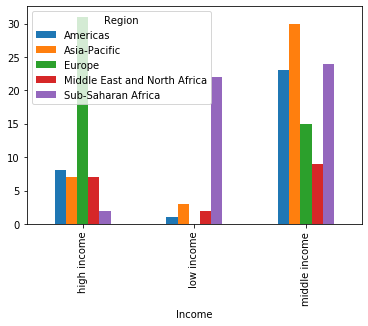

In [16]:
df.groupby('Income')['Region'].value_counts().unstack().plot(kind='bar')
#clustered bar chart based of frequencies

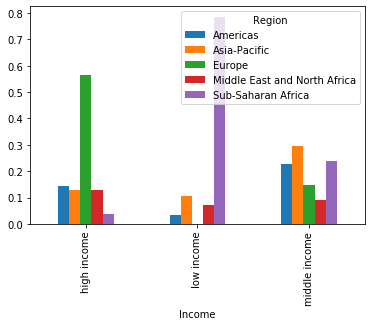

In [17]:
df.groupby('Income')['Region'].value_counts(normalize=True).unstack().plot(kind='bar')
#clustered bar chart based of percentages

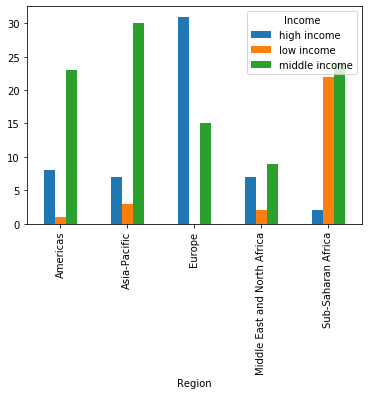

In [18]:
df.groupby('Region')['Income'].value_counts().unstack().plot(kind='bar')
#grouping and main variable swapped

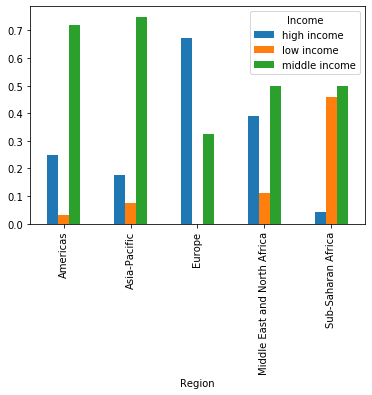

In [19]:
df.groupby('Region')['Income'].value_counts(normalize=True).unstack().plot(kind='bar')

# Chi-squared statistical test

**Income and Region**

In [20]:
ct_income_region = pd.crosstab(df['Income'], df['Region'])
ct_income_region

Region,Americas,Asia-Pacific,Europe,Middle East and North Africa,Sub-Saharan Africa
Income,,,,,
high income,8,7,31,7,2
low income,1,3,0,2,22
middle income,23,30,15,9,24


In [21]:
stats.chi2_contingency(ct_income_region)

(85.54874205277672,
 3.711290324091757e-15,
 8,
 array([[ 9.56521739, 11.95652174, 13.75      ,  5.38043478, 14.34782609],
        [ 4.86956522,  6.08695652,  7.        ,  2.73913043,  7.30434783],
        [17.56521739, 21.95652174, 25.25      ,  9.88043478, 26.34782609]]))

chi2 = 85.54874205277672

p-value = 3.711290324091757e-15

df=8 (2 * 4)

array - contains expected frequencies (we have only one value below 5)

In [22]:
print('chi2 = ', stats.chi2_contingency(ct_income_region)[0], '   p-value =', stats.chi2_contingency(ct_income_region)[1])

chi2 =  85.54874205277672    p-value = 3.711290324091757e-15


## Conclusions

H1: there is a relationship between the region where the country is located and the income group it belongs to

H1: there is no relationship between the region where the country is located and the income group it belongs to

p-value = 0.0002 < 0.05

p-value = 0.0002 < 0.01

H1 is accepted both at 5% and at 1% level of significance

**Population and Region**

In [23]:
ct_population_region = pd.crosstab(df['Population'], df['Region'])
ct_population_region

Region,Americas,Asia-Pacific,Europe,Middle East and North Africa,Sub-Saharan Africa
Population,,,,,
0.038137,0,0,1,0,0
0.071991,1,0,0,0,0
0.098462,0,0,0,0,1
0.105697,0,1,0,0,0
0.110947,1,0,0,0,0
...,...,...,...,...,...
220.892331,0,1,0,0,0
273.523621,0,1,0,0,0
329.484123,1,0,0,0,0


In [24]:
stats.chi2_contingency(ct_population_region)

(736.0,
 0.45154110319069557,
 732,
 array([[0.17391304, 0.2173913 , 0.25      , 0.09782609, 0.26086957],
        [0.17391304, 0.2173913 , 0.25      , 0.09782609, 0.26086957],
        [0.17391304, 0.2173913 , 0.25      , 0.09782609, 0.26086957],
        [0.17391304, 0.2173913 , 0.25      , 0.09782609, 0.26086957],
        [0.17391304, 0.2173913 , 0.25      , 0.09782609, 0.26086957],
        [0.17391304, 0.2173913 , 0.25      , 0.09782609, 0.26086957],
        [0.17391304, 0.2173913 , 0.25      , 0.09782609, 0.26086957],
        [0.17391304, 0.2173913 , 0.25      , 0.09782609, 0.26086957],
        [0.17391304, 0.2173913 , 0.25      , 0.09782609, 0.26086957],
        [0.17391304, 0.2173913 , 0.25      , 0.09782609, 0.26086957],
        [0.17391304, 0.2173913 , 0.25      , 0.09782609, 0.26086957],
        [0.17391304, 0.2173913 , 0.25      , 0.09782609, 0.26086957],
        [0.17391304, 0.2173913 , 0.25      , 0.09782609, 0.26086957],
        [0.17391304, 0.2173913 , 0.25      , 0.0978260

Please note that here the Chi-squared statistical test is not applicable. We dont't have enough frequencies in each cell of the contingency table to make conclusions about the relationship of the variables. 

# Normality Tests

## Shapiro-Wilk normality test

In [25]:
stats.shapiro(df.PropertyRights.dropna())

ShapiroResult(statistic=0.9639394283294678, pvalue=0.00015604378131683916)

In [26]:
stats.shapiro(df.PropertyRights.dropna()).statistic

0.9639394283294678

In [27]:
stats.shapiro(df.PropertyRights.dropna()).pvalue

0.00015604378131683916

H1: The distribution of Property Rights variable is different from the normal distribution

H0: The distribution of Property Rights variable is not different from the normal distribution

Conclusion: as p-value < 0.05, H1 is accepted => the distribution is significantly different from normal

### ! But for sample size greater than 50 it's more appropriate to run the Kolmogorov-Smirnov normality test

## Kolmogorov-Smirnov normality test

**Property Rights**

In [28]:
stats.kstest(df.PropertyRights.dropna(), 'norm', args=(df.PropertyRights.dropna().mean(), df.PropertyRights.dropna().std()))

KstestResult(statistic=0.08754620758269493, pvalue=0.12493693062548095)

H1: The distribution of Property Rights variable is different from the normal distribution

H0: The distribution of Property Rights variable is not different from the normal distribution

Conclusion: as p-value > 0.05, H1 is rejected => the distribution is not significantly different from normal

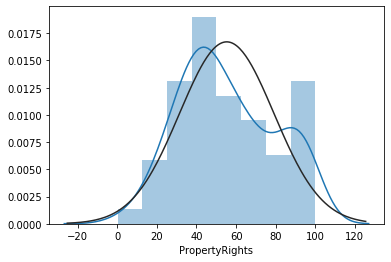

In [29]:
import seaborn as sns
from scipy.stats import norm
sns.distplot(df.PropertyRights.dropna(), fit=norm) 

**Judicial Effectiveness**

In [30]:
stats.kstest(df.JudicialEffectiveness.dropna(), 'norm', args=(df.JudicialEffectiveness.dropna().mean(), df.JudicialEffectiveness.dropna().std()))
# the distribution is different from normal

KstestResult(statistic=0.10190603146254101, pvalue=0.047118263959099904)

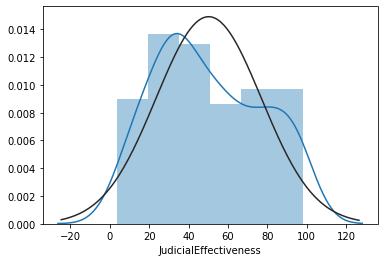

In [31]:
import seaborn as sns
from scipy.stats import norm
sns.distplot(df.JudicialEffectiveness.dropna(), fit=norm) 

**Government Integrity**

In [32]:
stats.kstest(df.GovernmentIntegrity.dropna(), 'norm', args=(df.GovernmentIntegrity.dropna().mean(), df.GovernmentIntegrity.dropna().std()))
# the distribution is not different from normal

KstestResult(statistic=0.10044514424497186, pvalue=0.05238559962504008)

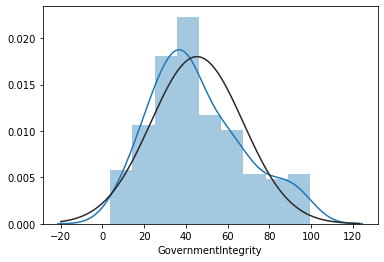

In [33]:
import seaborn as sns
from scipy.stats import norm
sns.distplot(df.GovernmentIntegrity.dropna(), fit=norm) 

**Population**

In [34]:
stats.kstest(df.Population.dropna(), 'norm', args=(df.Population.dropna().mean(), df.Population.dropna().std()))
# the distribution is very different from normal

KstestResult(statistic=0.3896799476407878, pvalue=1.1294446452642563e-25)

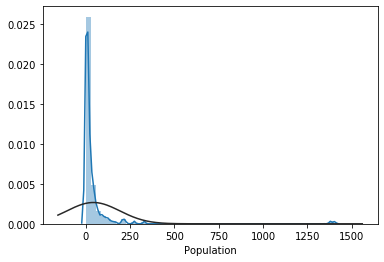

In [35]:
import seaborn as sns
from scipy.stats import norm
sns.distplot(df.Population.dropna(), fit=norm) 

**Tax Burden**

In [36]:
stats.kstest(df.TaxBurden.dropna(), 'norm', args=(df.TaxBurden.dropna().mean(), df.TaxBurden.dropna().std()))
# the distribution is not different from normal

KstestResult(statistic=0.07857795801364204, pvalue=0.21299059508133233)

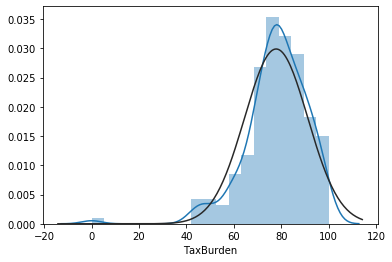

In [37]:
import seaborn as sns
from scipy.stats import norm
sns.distplot(df.TaxBurden.dropna(), fit=norm) 

**Business Freedom**

In [38]:
stats.kstest(df.BusinessFreedom.dropna(), 'norm', args=(df.BusinessFreedom.dropna().mean(), df.BusinessFreedom.dropna().std()))
# the distribution is not different from normal

KstestResult(statistic=0.05355307282514549, pvalue=0.6700455866777724)

We have analyzed the distribution of 6 variables. Four of them have the distributions, that are not significantly different from normal distribution (Property Rights, Government Integrity, Tax Burden, Business Freedom) the other two variables have the distributions, that are significantly different from normal distribution (Judicial Effectiveness and Population).

# Correlation Analysis

### Pearson correlation coefficient

In [39]:
df.corr() #Pearson correlation coefficient is calculated for all possible pairs of quantitative variables
#This is not a good solution as for several pairs of variables the Pearson correlation coefficient can't be calculated

,HighIncome,WorldRank,RegionRank,2022Score,PropertyRights,JudicialEffectiveness,GovernmentIntegrity,TaxBurden,GovernmentSpending,FiscalHealth,...,GovernmentExpenditurofGDP,Population,GDP,GDP_GrowthRate,5Year_GDP_GrowthRate,GDPperCapita,Unemployment,Inflation,FDIInflow,PublicDebt
HighIncome,1.000000,-0.703627,-0.458652,0.654808,0.783696,0.670526,0.746888,-0.211935,-0.443102,0.077721,...,0.376681,-0.086066,0.105872,-0.065533,-0.106977,0.812656,-0.143013,-0.075679,0.107192,0.120777
WorldRank,-0.703627,1.000000,0.671819,-0.942221,-0.882578,-0.811826,-0.825732,0.092647,0.270412,-0.349920,...,-0.270561,0.135458,-0.037887,0.036265,-0.082493,-0.693644,-0.003218,0.184957,-0.070361,0.088095
RegionRank,-0.458652,0.671819,1.000000,-0.658618,-0.582894,-0.586951,-0.621292,0.014309,-0.000468,-0.109971,...,-0.032125,0.094595,-0.014847,0.028501,-0.061593,-0.458016,0.008017,0.124216,-0.068262,0.097618
2022Score,0.654808,-0.942221,-0.658618,1.000000,0.852226,0.787327,0.810730,0.036147,-0.176495,0.386586,...,0.243048,-0.100220,0.045936,0.039911,0.185760,0.702673,-0.001213,-0.324702,0.079525,-0.180553
PropertyRights,0.783696,-0.882578,-0.582894,0.852226,1.000000,0.883544,0.908930,-0.218941,-0.480174,0.095149,...,0.474620,-0.066714,0.121896,-0.088716,0.032597,0.737042,0.000358,-0.219572,0.124146,0.051824
JudicialEffectiveness,0.670526,-0.811826,-0.586951,0.787327,0.883544,1.000000,0.875754,-0.298429,-0.471776,0.068856,...,0.478827,-0.049565,0.093899,-0.121768,-0.037561,0.597709,0.109296,-0.169817,0.065910,0.078384
GovernmentIntegrity,0.746888,-0.825732,-0.621292,0.810730,0.908930,0.875754,1.000000,-0.253096,-0.486541,0.075348,...,0.474317,-0.044588,0.129800,-0.089310,-0.007932,0.762242,0.053916,-0.169612,0.129183,0.052550
TaxBurden,-0.211935,0.092647,0.014309,0.036147,-0.218941,-0.298429,-0.253096,1.000000,0.368868,0.026818,...,-0.256166,-0.035173,-0.108545,-0.050805,0.097095,-0.202832,0.020498,-0.038834,-0.001354,-0.156537
GovernmentSpending,-0.443102,0.270412,-0.000468,-0.176495,-0.480174,-0.471776,-0.486541,0.368868,1.000000,0.103853,...,-0.940256,0.066861,-0.061540,0.201249,0.239874,-0.387822,-0.110454,0.070892,-0.017156,-0.090317
FiscalHealth,0.077721,-0.349920,-0.109971,0.386586,0.095149,0.068856,0.075348,0.026818,0.103853,1.000000,...,-0.076623,-0.218035,-0.218761,0.301306,0.278709,0.123133,-0.223367,-0.148299,-0.170508,-0.476086


Pearson correlation coefficient can be calculated to evaluate the relationship between Property Rights and Government Integrity as their distributions are not significantly different from normal.

In [40]:
df['PropertyRights'].corr(df['GovernmentIntegrity']) #there is a very strong correlation between the variables

0.9089304910383801

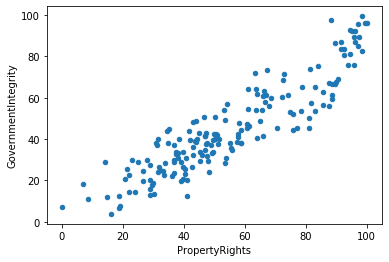

In [41]:
df.plot('PropertyRights', 'GovernmentIntegrity', kind='scatter')

In [42]:
df[['GovernmentIntegrity','PropertyRights','TaxBurden']].corrwith(df['BusinessFreedom'])
#Pearson correlation coefficient between Business Freedom and 3 other variables, that are normally distributed

GovernmentIntegrity    0.811561
PropertyRights         0.846771
TaxBurden             -0.066774
dtype: float64

In [43]:
df[['GovernmentIntegrity','PropertyRights','TaxBurden']].corrwith(df['BusinessFreedom']).sort_values()
#correlation coefficients sorted in ascending order

TaxBurden             -0.066774
GovernmentIntegrity    0.811561
PropertyRights         0.846771
dtype: float64

In [44]:
df[['GovernmentIntegrity','PropertyRights','TaxBurden', 'BusinessFreedom']].corr()
#correlation matrix based on 4 variables

,GovernmentIntegrity,PropertyRights,TaxBurden,BusinessFreedom
GovernmentIntegrity,1.000000,0.908930,-0.253096,0.811561
PropertyRights,0.908930,1.000000,-0.218941,0.846771
TaxBurden,-0.253096,-0.218941,1.000000,-0.066774
BusinessFreedom,0.811561,0.846771,-0.066774,1.000000


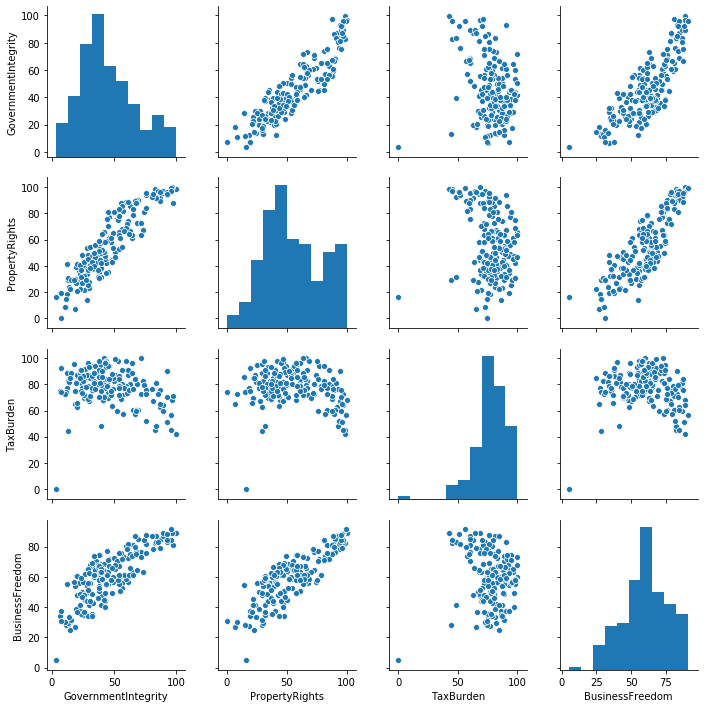

In [46]:
sns.pairplot(df[['GovernmentIntegrity','PropertyRights','TaxBurden', 'BusinessFreedom']]) #scatterplot matrix

In [47]:
df[['GovernmentIntegrity','PropertyRights','TaxBurden', 'BusinessFreedom']].corr().stack()
#represent the results as Series

GovernmentIntegrity  GovernmentIntegrity    1.000000
                     PropertyRights         0.908930
                     TaxBurden             -0.253096
                     BusinessFreedom        0.811561
PropertyRights       GovernmentIntegrity    0.908930
                     PropertyRights         1.000000
                     TaxBurden             -0.218941
                     BusinessFreedom        0.846771
TaxBurden            GovernmentIntegrity   -0.253096
                     PropertyRights        -0.218941
                     TaxBurden              1.000000
                     BusinessFreedom       -0.066774
BusinessFreedom      GovernmentIntegrity    0.811561
                     PropertyRights         0.846771
                     TaxBurden             -0.066774
                     BusinessFreedom        1.000000
dtype: float64

In [48]:
df[['GovernmentIntegrity', 'PropertyRights', 'BusinessFreedom', 'TaxBurden']].corr().stack().sort_values()
#represent the results as Series and sort them

GovernmentIntegrity  TaxBurden             -0.253096
TaxBurden            GovernmentIntegrity   -0.253096
PropertyRights       TaxBurden             -0.218941
TaxBurden            PropertyRights        -0.218941
BusinessFreedom      TaxBurden             -0.066774
TaxBurden            BusinessFreedom       -0.066774
GovernmentIntegrity  BusinessFreedom        0.811561
BusinessFreedom      GovernmentIntegrity    0.811561
PropertyRights       BusinessFreedom        0.846771
BusinessFreedom      PropertyRights         0.846771
GovernmentIntegrity  PropertyRights         0.908930
PropertyRights       GovernmentIntegrity    0.908930
GovernmentIntegrity  GovernmentIntegrity    1.000000
PropertyRights       PropertyRights         1.000000
BusinessFreedom      BusinessFreedom        1.000000
TaxBurden            TaxBurden              1.000000
dtype: float64

### Pearson correlation coefficient

In [49]:
stats.pearsonr(df.PropertyRights.dropna(), df.GovernmentIntegrity.dropna())

(0.9089304910383803, 2.162854230656371e-68)

In [50]:
 print("Pearson's r:", stats.pearsonr(df.PropertyRights.dropna(), df.GovernmentIntegrity.dropna())[0], 
       '    p-value:', stats.pearsonr(df.PropertyRights.dropna(), df.GovernmentIntegrity.dropna())[1])

Pearson's r: 0.9089304910383803     p-value: 2.162854230656371e-68


These two variables are scale variables; their distributions are not different from normal. Therefore, to evaluate the relationship between them we can calculate Pearson correlation coefficient.

H1: There is a relationship between Government Integrity and Property Rights (r != 0)

H0: There is no relationship between Government Integrity and Property Rights (r = 0)

1. Significance of relationship: the relationship is statistically significant as p-value < 0.05, H1 is accepted.
2. Direction of relationship: correlation coefficient is positive, therefore, there is a direct relationship between the variables.
3. Strength of the relationship: the correlation coefficient is 0.91, therefore, there is a very strong correlation between the variables.

### Spearman correlation coefficient

In [51]:
df = df.dropna(subset=['JudicialEffectiveness'])
stats.spearmanr(df.JudicialEffectiveness, df.Population.dropna())

SpearmanrResult(correlation=-0.2361216987280226, pvalue=0.001556172694576779)

These two variables are scale variables, but their distributions are different from normal. Therefore, to evaluate the relationship between them we should calculate rank correlation coefficients (either Spearman or Kendall). As the values of each variable are mostly unique, and when we rank them we will receive nearly no tied ranks, the Spearman correlation is appropriate.

H1: There is a relationship between Judicial Effectiveness and Population (r != 0)

H0: There is no relationship between Judicial Effectiveness and Population (r = 0)

1. Significance of relationship: the relationship is statistically significant as p-value < 0.05, H1 is accepted.
2. Direction of relationship: correlation coefficient is negative, therefore, there is an inverse relationship between the variables.
3. Strength of the relationship: the correlation coefficient is -0.23, therefore, there is a weak correlation between the variables.

In [52]:
df[['JudicialEffectiveness','Population','BusinessFreedom']].corr('spearman') #Spearman correlation matrix

,JudicialEffectiveness,Population,BusinessFreedom
JudicialEffectiveness,1.000000,-0.236122,0.735493
Population,-0.236122,1.000000,-0.014712
BusinessFreedom,0.735493,-0.014712,1.000000


### Kendall correlation coefficient

In [53]:
df = pd.read_excel('index2022_data.xls', index_col=0)
df['Income'].value_counts()

middle income    101
high income       55
low income        28
Name: Income, dtype: int64

In [54]:
df['Income']=df['Income'].replace('low income', 1)
df['Income']=df['Income'].replace('middle income', 2)
df['Income']=df['Income'].replace('high income', 3)
df['Income'].value_counts()
#transform Income from string to int

2    101
3     55
1     28
Name: Income, dtype: int64

In [55]:
stats.kendalltau(df.Income, df.Population)

KendalltauResult(correlation=-0.11520033540551912, pvalue=0.04663141816283297)

Population is a scale variable, it's distribution is different from normal. Income is a categorical variable with ordinal scale of measurement. Therefore, to evaluate the relationship between them we should calculate rank correlation coefficients (either Spearman or Kendall). As most of the values of Income value are not unique, and when we rank them, we will receive many tied ranks, the Kendall correlation is appropriate.

H1: There is a relationship between Income and Population (r != 0)

H0: There is no relationship between Income and Population (r = 0)

1. Significance of relationship: the relationship is statistically significant as p-value < 0.05, H1 is accepted.
2. Direction of relationship: correlation coefficient is negative, therefore, there is an inverse relationship between the variables.
3. Strength of the relationship: the correlation coefficient is -0.11, therefore, there is a very weak correlation between the variables.


In [56]:
df[['Income','Population','InvestmentFreedom']].corr('kendall') #Kendall correlation matrix

,Income,Population,InvestmentFreedom
Income,1.00000,-0.115200,0.479620
Population,-0.11520,1.000000,-0.085591
InvestmentFreedom,0.47962,-0.085591,1.000000


# Partial Correlation

Let's calculate a correlation between Property Rights and Government Integrity.

In [58]:
import pingouin as pg

More about pingouin: https://pingouin-stats.org/api.html

In [59]:
df = pd.read_excel('index2022_data.xls', index_col=0)
stats.pearsonr(df.PropertyRights.dropna(), df.GovernmentIntegrity.dropna())

(0.9089304910383803, 2.162854230656371e-68)

Now let's control for the effect of Population

In [60]:
from math import sqrt
df = pd.read_excel('index2022_data.xls', index_col=0)
df = df.dropna(subset=['Population'])
df = df.dropna(subset=['JudicialEffectiveness'])
df = df.dropna(subset=['PropertyRights'])
r_xy = stats.pearsonr(df.PropertyRights.dropna(), df.GovernmentIntegrity.dropna())[0]
r_xz = stats.pearsonr(df.PropertyRights.dropna(), df.Population.dropna())[0]
r_yz = stats.pearsonr(df.GovernmentIntegrity.dropna(), df.Population.dropna())[0]
r_xy_z = (r_xy - r_xz * r_yz) / sqrt((1 - r_xz ** 2) * (1 - r_yz ** 2))
print('Paired correlation coefficient between  Property Rights and Government Integrity: ',r_xy)
print('Partial correlation coefficient between  Property Rights and Government Integrity, controlling for the effect of Population: ',r_xy_z)

Paired correlation coefficient between  Property Rights and Government Integrity:  0.9089304910383803
Partial correlation coefficient between  Property Rights and Government Integrity, controlling for the effect of Population:  0.9088826185797


In [61]:
pg.partial_corr(data=df, x='PropertyRights', y='GovernmentIntegrity', covar='Population') 

,n,r,CI95%,p-val
pearson,177,0.908883,"[0.88, 0.93]",5.433943e-68


In [62]:
pg.partial_corr(data=df, x='PropertyRights', y='GovernmentIntegrity', covar='Population', method = 'spearman')

,n,r,CI95%,p-val
spearman,177,0.90216,"[0.87, 0.93]",1.970185e-65


We can conclude that the correlation between Property Rights and Government Integrity did not change after controlling for Population.

Let’s look at the results of the research which studies the  attitude of the Germans to foreign workers. There are 3 variables in the database:

    1) Age;
    2) Attitude to foreign workers (from 0 to 30, the higher the value, the more negative is the attitude);
    3) Frequency of visiting a church (1 – never, 6 – at least 2 times per week). 

In [63]:
df1 = pd.read_stata('partial.dta')
df1

,age,church,newcomer
0,56,4,17
1,80,5,16
2,64,4,19
3,65,5,19
4,48,3,17
5,41,3,14
6,44,4,21
7,43,2,16
8,57,4,17
9,62,5,18


Let's calculate a paired correlation coefficient between church and newcomer

In [64]:
stats.kendalltau(df1.church, df1.newcomer)
#correlation is statically significant, positive and weak

KendalltauResult(correlation=0.413158691042416, pvalue=0.0020961003342962717)

It means that the more frequently a person visits the church, the more negative is his attitude towards foreign workers, which is rather strange result. Let's control the correlation for the age variable.

In [65]:
pg.partial_corr(data=df1, x='church', y='newcomer', covar='age')

,n,r,CI95%,p-val
pearson,35,0.12149,"[-0.23, 0.44]",0.493692


The correlation now in not statistically significant. Most likely, a negative attitude is more inherent to older people, but they also visit church more frequently.

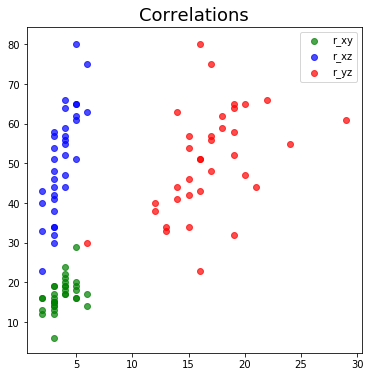

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))

plt.scatter(df1.church, df1.newcomer, c='g', alpha=0.7, label='r_xy')
plt.scatter(df1.church, df1.age, c='b', alpha=0.7, label='r_xz')
plt.scatter(df1.newcomer, df1.age, c='r', alpha=0.7, label='r_yz')
plt.title('Correlations', fontsize=18)
plt.legend()
plt.show()

# Visualization of correlations

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
corr = df.dropna().corr()
corr.style.background_gradient(cmap='coolwarm')

,HighIncome,WorldRank,RegionRank,2022Score,PropertyRights,JudicialEffectiveness,GovernmentIntegrity,TaxBurden,GovernmentSpending,FiscalHealth,BusinessFreedom,LaborFreedom,MonetaryFreedom,TradeFreedom,InvestmentFreedom,FinancialFreedom,TariffRate,IncomeTaxRate,CorporateTaxRate,TaxBurdenofGDP,GovernmentExpenditurofGDP,Population,GDP,GDP_GrowthRate,5Year_GDP_GrowthRate,GDPperCapita,Unemployment,Inflation,FDIInflow,PublicDebt
HighIncome,1.000000,-0.709347,-0.448947,0.698016,0.791646,0.694236,0.754961,-0.279166,-0.549188,0.077839,0.699194,0.450856,0.354742,0.519172,0.559101,0.632957,-0.418791,0.128336,-0.342187,0.513397,0.518110,-0.091980,0.100735,-0.110977,-0.122376,0.812270,-0.117199,-0.078469,0.106179,0.099868
WorldRank,-0.709347,1.000000,0.672378,-0.974158,-0.888686,-0.824723,-0.832759,0.202724,0.378065,-0.328152,-0.857083,-0.603409,-0.537031,-0.642566,-0.790349,-0.795856,0.498849,-0.115296,0.335829,-0.534933,-0.374727,0.142253,-0.035087,0.054379,-0.061869,-0.698744,0.015420,0.185709,-0.067924,0.088435
RegionRank,-0.448947,0.672378,1.000000,-0.678422,-0.575963,-0.584130,-0.615999,0.076703,0.029890,-0.093148,-0.521068,-0.424739,-0.372197,-0.386796,-0.543719,-0.575662,0.286805,-0.066221,0.184630,-0.203024,-0.045284,0.099268,-0.013304,0.034266,-0.053922,-0.460427,0.023857,0.126077,-0.066695,0.111073
2022Score,0.698016,-0.974158,-0.678422,1.000000,0.889256,0.822870,0.845998,-0.205229,-0.369643,0.351233,0.859838,0.612696,0.636803,0.670834,0.802761,0.807683,-0.542612,0.127635,-0.324539,0.521772,0.364591,-0.118760,0.042178,0.009735,0.156170,0.716146,-0.045581,-0.325542,0.078039,-0.186770
PropertyRights,0.791646,-0.888686,-0.575963,0.889256,1.000000,0.886663,0.910094,-0.323589,-0.566544,0.079379,0.855423,0.591606,0.519371,0.595382,0.733747,0.723992,-0.466772,0.199352,-0.293941,0.636278,0.558282,-0.067224,0.124643,-0.094114,0.023343,0.747351,-0.013014,-0.219591,0.126065,0.049395
JudicialEffectiveness,0.694236,-0.824723,-0.584130,0.822870,0.886663,1.000000,0.881809,-0.419579,-0.530157,0.042010,0.766673,0.618418,0.461156,0.485304,0.646194,0.630123,-0.380202,0.300149,-0.153592,0.680809,0.526272,-0.048180,0.099663,-0.137519,-0.047191,0.622372,0.085725,-0.170120,0.067823,0.087440
GovernmentIntegrity,0.754961,-0.832759,-0.615999,0.845998,0.910094,0.881809,1.000000,-0.364660,-0.566886,0.062252,0.819878,0.585173,0.460364,0.530628,0.658400,0.691274,-0.404195,0.237901,-0.275194,0.631112,0.564063,-0.044300,0.132760,-0.091185,-0.014077,0.771039,0.038506,-0.169318,0.129897,0.049883
TaxBurden,-0.279166,0.202724,0.076703,-0.205229,-0.323589,-0.419579,-0.364660,1.000000,0.293132,-0.068991,-0.233014,-0.228528,-0.114350,0.001518,-0.240531,-0.198070,-0.013927,-0.911418,-0.532482,-0.626209,-0.234014,-0.047834,-0.115188,-0.093481,0.054761,-0.216057,-0.027239,-0.039178,-0.010861,-0.157128
GovernmentSpending,-0.549188,0.378065,0.029890,-0.369643,-0.566544,-0.530157,-0.566886,0.293132,1.000000,0.069018,-0.537993,-0.330255,-0.296394,-0.410247,-0.387699,-0.398635,0.375631,-0.081873,0.310771,-0.646088,-0.981063,0.053947,-0.087510,0.198521,0.219914,-0.468543,-0.122263,0.069781,-0.031089,-0.127967
FiscalHealth,0.077839,-0.328152,-0.093148,0.351233,0.079379,0.042010,0.062252,-0.068991,0.069018,1.000000,0.122445,0.004196,0.157669,0.088258,0.095737,0.060798,-0.063385,0.080623,-0.061773,0.055462,-0.113536,-0.229778,-0.227283,0.279380,0.257361,0.132084,-0.260480,-0.151513,-0.179417,-0.468343


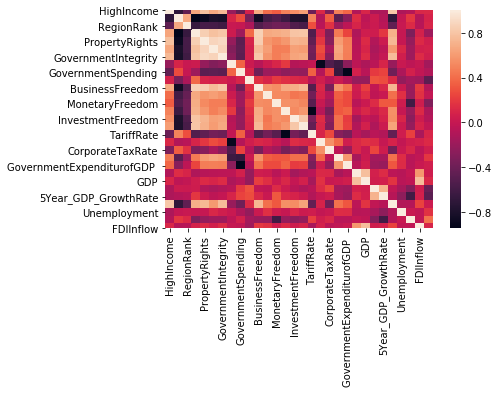

In [69]:
sns.heatmap(df.corr())

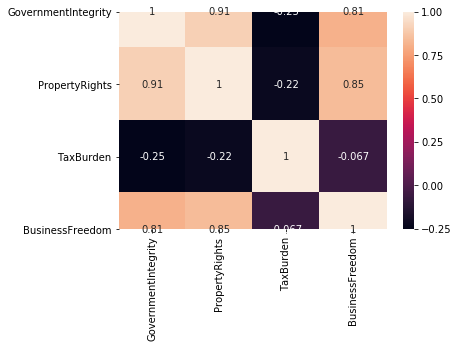

In [70]:
sns.heatmap(df[['GovernmentIntegrity','PropertyRights','TaxBurden', 'BusinessFreedom']].corr(), annot=True)

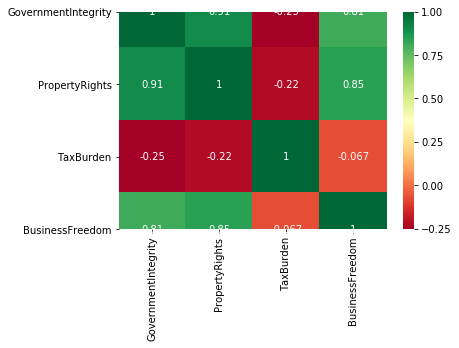

In [71]:
sns.heatmap(df[['GovernmentIntegrity','PropertyRights','TaxBurden', 'BusinessFreedom']].corr(), annot=True, cmap='RdYlGn')

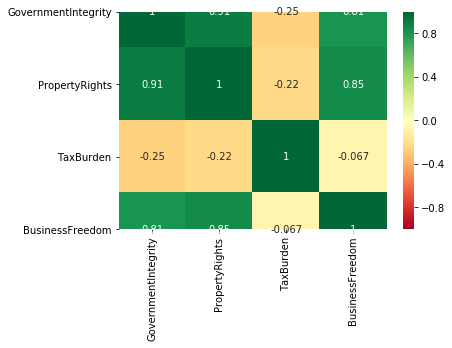

In [72]:
sns.heatmap(df[['GovernmentIntegrity','PropertyRights','TaxBurden', 'BusinessFreedom']].corr(), annot=True, cmap='RdYlGn', vmax=1, vmin=-1) 